In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read data from csv files
train_data = pd.read_csv('./data_train.csv', sep=',', header=0, index_col=0)
dev_data = pd.read_csv('./data_dev.csv', sep=',', header=0, index_col=0)
test_data = pd.read_csv('./data_test.csv', sep=',', header=0, index_col=0)


In [3]:
# separate into labels and features
lab_df_train = train_data.iloc[:, 0]
feat_df_train = train_data.iloc[:, 1:-1]

lab_df_dev = dev_data.iloc[:, 0]
feat_df_dev = dev_data.iloc[:, 1:-1]

lab_df_test = test_data.iloc[:, 0]
feat_df_test = test_data.iloc[:, 1:-1]

### Train

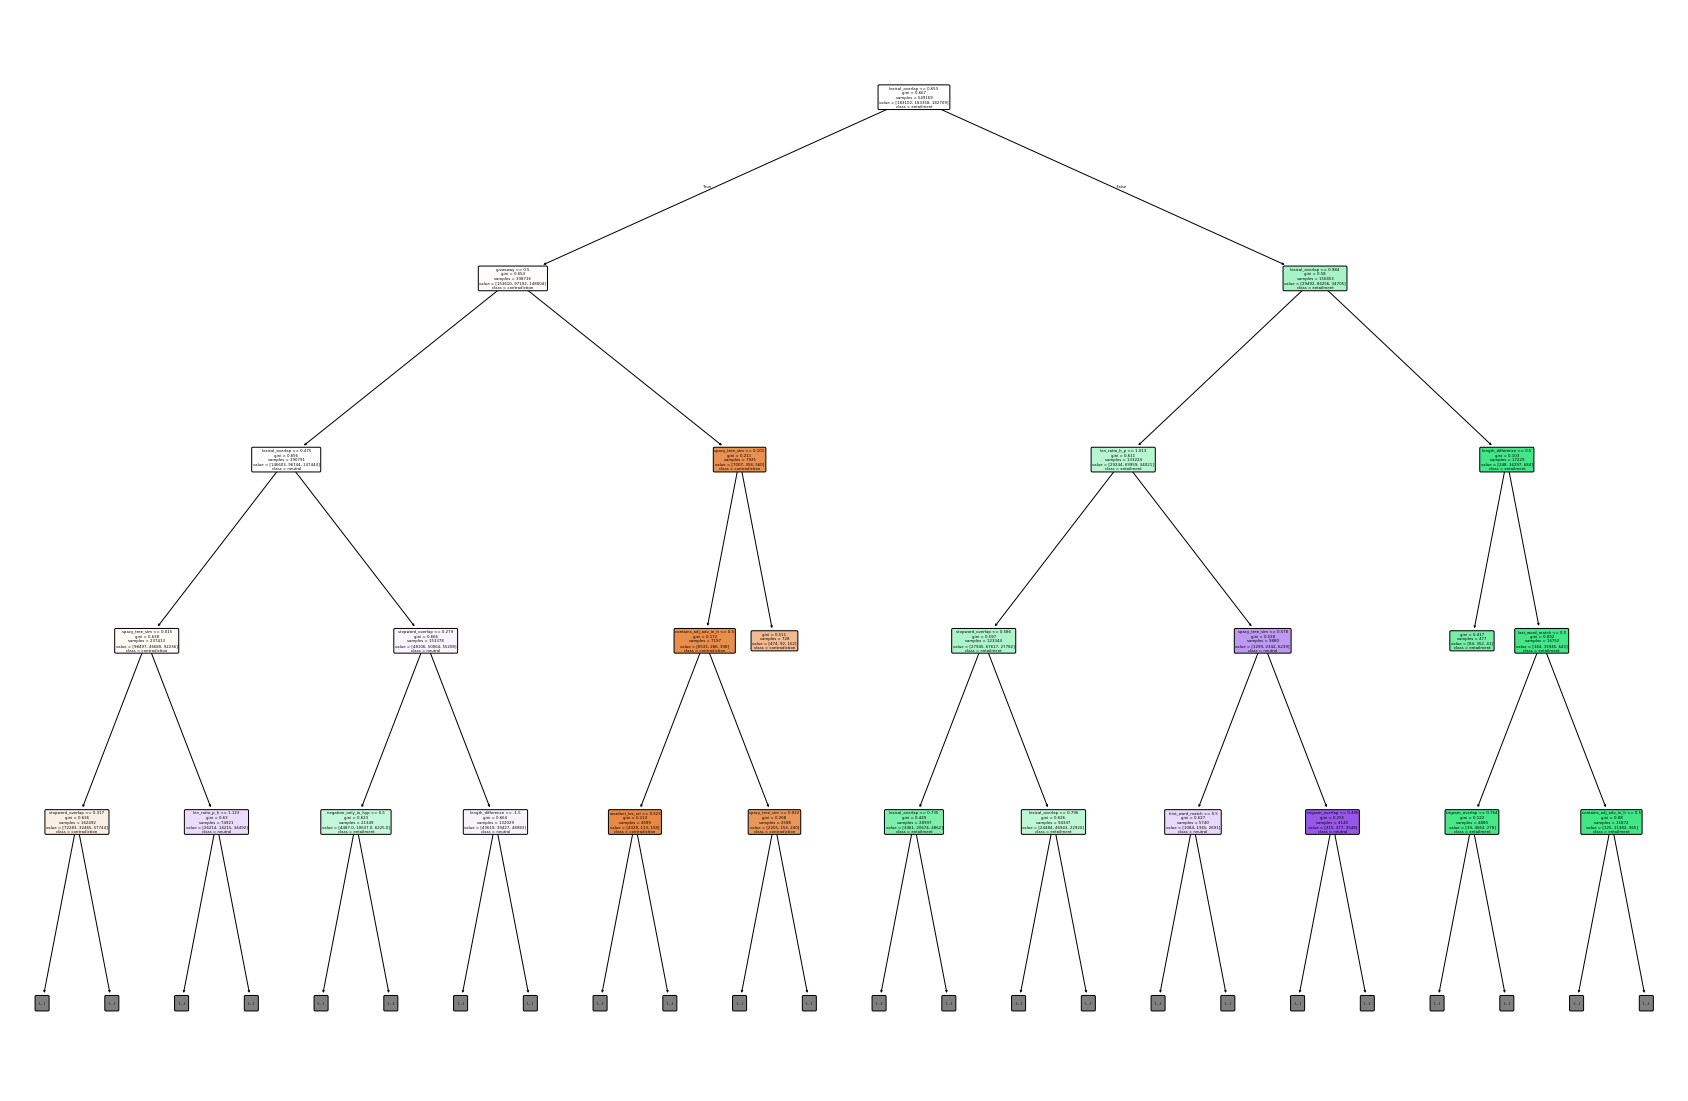

In [5]:
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import plot_tree

# initialize and train Decision Tree classifier 
DT = DTC(criterion="gini", min_samples_split= 1000, max_depth=20, random_state=0)
dt = DT.fit(feat_df_train, lab_df_train)

# initialize and train Random Forest classifier 
RF = RFC(n_estimators=50, max_features=20, min_samples_split=500, max_depth=20)
rf = RF.fit(feat_df_train, lab_df_train)

# plot decision tree (or part of it)
plt.figure(figsize=(30, 20)) 
plot_tree(dt,
          max_depth=4,
          feature_names=feat_df_train.columns,
          class_names=dt.classes_,
          filled=True,
          rounded=True,
)
plt.show()

In [6]:
def evaluate(model, feat_df, lab_df):
    """
    model - a classifier to predict NLI classes
    dataset and sem2anno are the similar to the output of snli_jsonl2dict
    dataset - a dict of nli problems: keys are problem ids and values problem descriptions
    sen2anno - a dict of sentence annotations from SNLI: keys are sentences and values its tree, pos tag and tokenozation.
    The function converts problems in dataset into set of feature-values (sen2anno can be used reprocess each sentence once)
    and predicts the inference classes of the problems.
    It can use spacy model "NLP" on-fly to get features based on its analyses.
    Returns a list of predictions and a list of gold values
    """

    pred_list = model.predict(feat_df)
    return pred_list.tolist(), lab_df.values.squeeze().tolist()

In [11]:
# TEST
from nltk.metrics.scores import accuracy
from nltk.metrics import ConfusionMatrix
from sklearn.metrics import f1_score, precision_score, recall_score

MODEL = { 'decision tree': dt, 'random forest': rf}
for name in MODEL:
    pred, gold = evaluate(MODEL[name], feat_df= feat_df_dev, lab_df=lab_df_dev)
    print(f"{name:=^80}")
    print(ConfusionMatrix(gold, pred))
    print(f"Accuracy = {accuracy(gold, pred)}")
    print(f"Precision = {precision_score(gold, pred, average='macro')}")
    print(f"Recall = {recall_score(gold, pred, average='macro')}")
    print(f"F_measure = {f1_score(gold, pred, average='macro')}")
    print(f"{'':=^80}")

=================================decision tree==================================
              |    c           |
              |    o           |
              |    n           |
              |    t    e      |
              |    r    n      |
              |    a    t      |
              |    d    a    n |
              |    i    i    e |
              |    c    l    u |
              |    t    m    t |
              |    i    e    r |
              |    o    n    a |
              |    n    t    l |
--------------+----------------+
contradiction |<1804> 586  888 |
   entailment |  642<2042> 645 |
      neutral | 1030  639<1566>|
--------------+----------------+
(row = reference; col = test)

Accuracy = 0.5498882340987604
Precision = 0.5497833004449156
Recall = 0.5492711193514153
F_measure = 0.5492797831444461
=================================random forest==================================
              |    c           |
              |    o           |
              |    n       